PS9
Collaborators: Kimberly and Azul

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import math

Problem 1
Please see attached file that includes 1.1 Linear Stability Analysis and another file with part of 1.2

In [43]:
# Defining the finite difference grid
class FDGrid(object):
    def __init__(self, nx, ng, xmin=0.0, xmax=1.0):
        self.xmin = xmin
        self.xmax = xmax
        self.ng = ng
        self.nx = nx
        self.ilo = ng
        self.ihi = ng + nx - 1
        self.dx = (xmax - xmin)/(nx - 1)
        self.x = xmin + (np.arange(nx + 2*ng) - ng)*self.dx
        self.a = np.zeros((nx + 2*ng), dtype=np.float64)
        
    def scratch_array(self):
        return np.zeros((self.nx + 2*self.ng), dtype=np.float64)
        
    def fill_BCs(self):
        self.a[self.ilo - 1] = self.a[self.ihi - 1]
        self.a[self.ihi + 1] = self.a[self.ilo + 1]
        
# Initializing data      
def init_cond_gaussian(x):
    return np.exp(-((x - 0.5)**2)/(0.1**2))

"""
Inputs: 
C: Courant number
nx: grid size
method : upwind implicit or Lax-Wendroff
error : calculate error

Produces a advection plot
"""
def create_plot(C, nx, method, error = False):
    t = 0
    ng = 1
    u = 1
    g  = FDGrid(nx, ng)
    # time info
    dt = C*g.dx/u
    t  = 0.0
    tmax = 1.0*(g.xmax - g.xmin)/u

    # Initialize data: gaussian
    for i in range(0,g.ihi):
        gaussian = math.exp(-(g.x[i]-0.5)**2/(0.1**2))
        g.a[i] = gaussian


    ainit = g.a.copy()
    # evolution loop
    anew = g.scratch_array()
    while t < tmax:
        g.fill_BCs()
        if t + dt > tmax:
            dt = tmax - t
            C = u*dt/g.dx
        for i in range(g.ilo, g.ihi+1):
            if method == 'L-W':
                anew[i] = g.a[i] - 0.5*C*(g.a[i+1] - g.a[i-1]) + 0.5*C**2 *(g.a[i+1] - 2*g.a[i] + g.a[i-1])
            # upwind
            elif i == g.ilo:
                anew[i] = g.a[i-1]
            elif method == 'upwind_implicit':
                anew[i] = (g.a[i] + (C*anew[i-1]))/(1+C)
            # store the updated solution
        g.a[:] = anew[:]
        t += dt
    if error:
        return calculate_error(g.a[g.ilo:g.ihi+1], ainit[g.ilo:g.ihi+1], g.dx)

    plt.plot(g.x[g.ilo:g.ihi+1], ainit[g.ilo:g.ihi+1], ls=":", c = 'y')
    plt.plot(g.x[g.ilo:g.ihi+1], g.a[g.ilo:g.ihi+1], c = 'b')
    plt.show()

In [44]:
# Calculate compared RMS error
def calculate_error(array_1, array_2, dx):
    summation = 0
    for i in range(0,len(array_1-1)):
        summation+= (array_1[i]-array_2[i])**2
    return (dx*summation)**(1/2)

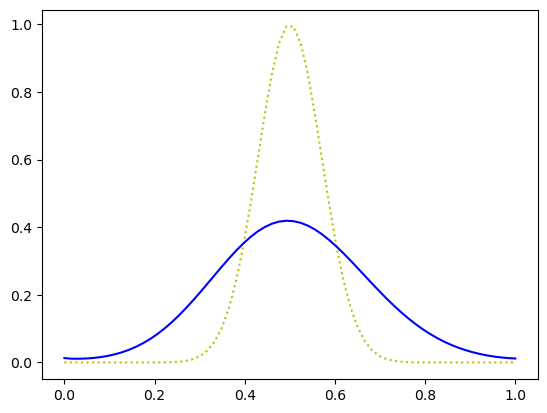

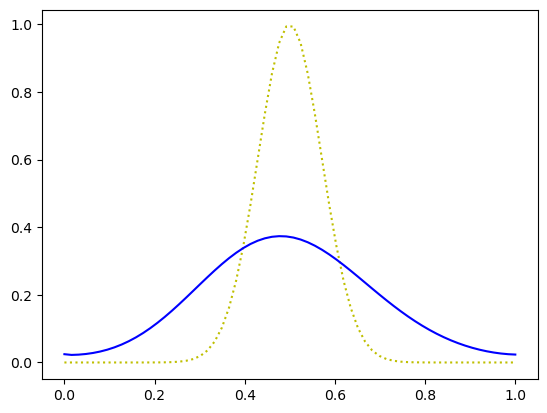

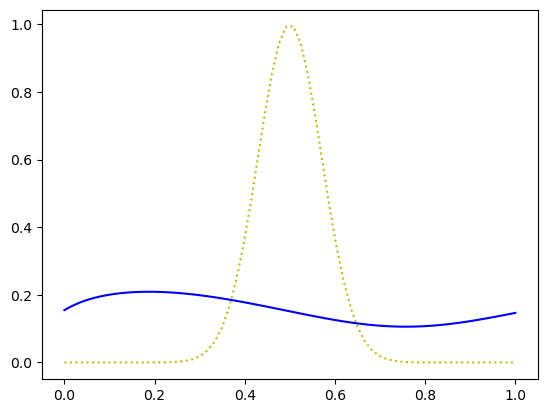

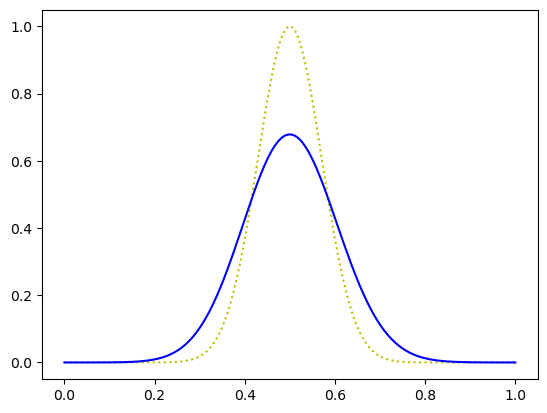

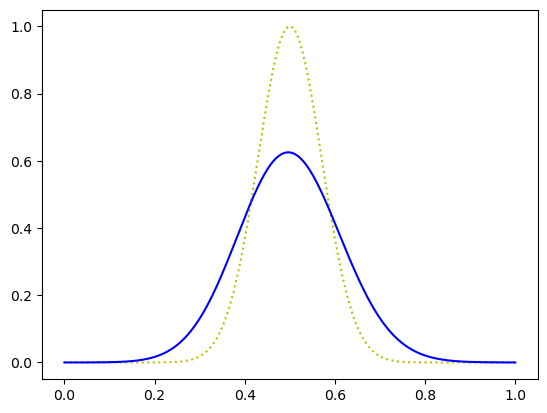

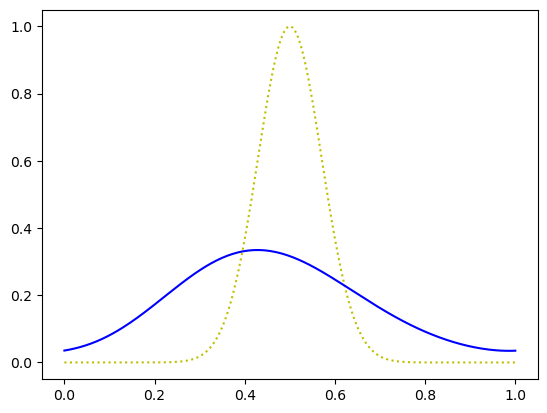

In [45]:
# Upwind implicit method

# Grid points = 64, C = 0.5,1,10
create_plot(0.5, 64, 'upwind_implicit')
create_plot(1, 64, 'upwind_implicit')
create_plot(10, 64, 'upwind_implicit')

# Grid points = 256, C = 0.5,1,10
create_plot(0.5, 256, 'upwind_implicit')
create_plot(1, 256, 'upwind_implicit')
create_plot(10, 256, 'upwind_implicit')

Increasing the grid size increases the accuracy of the plots

Problem 2

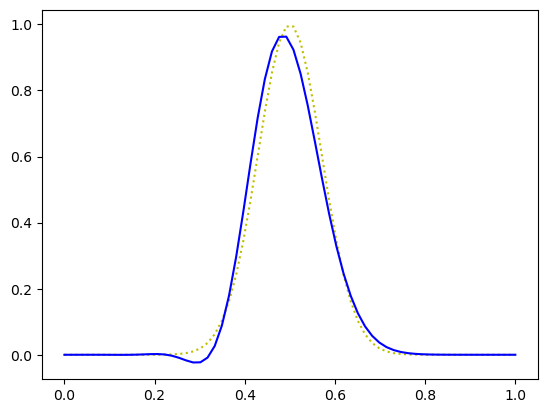

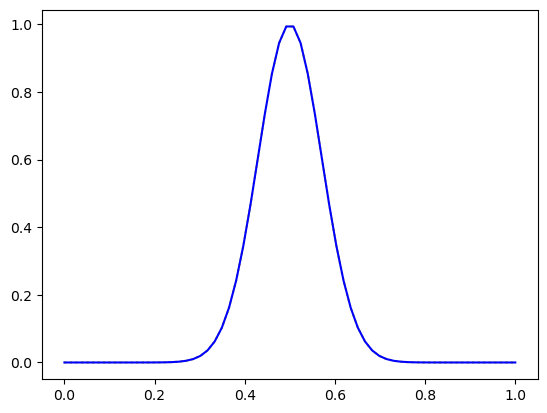

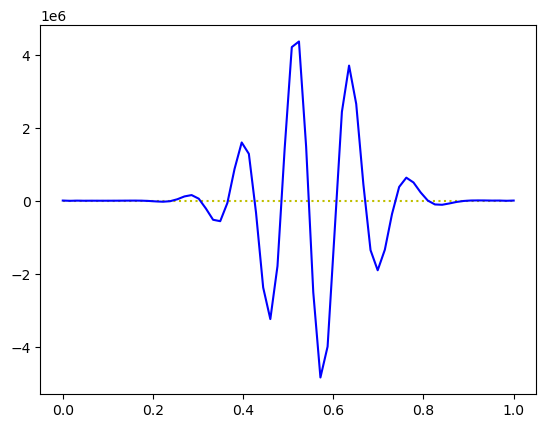

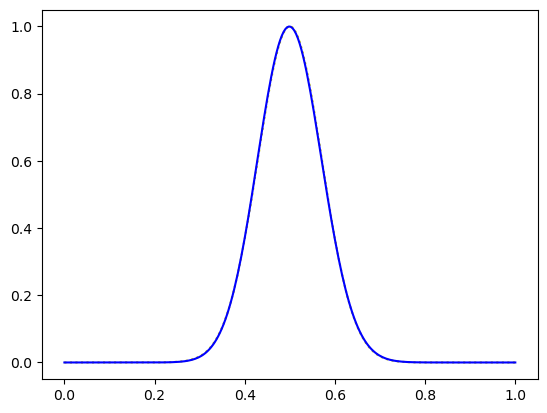

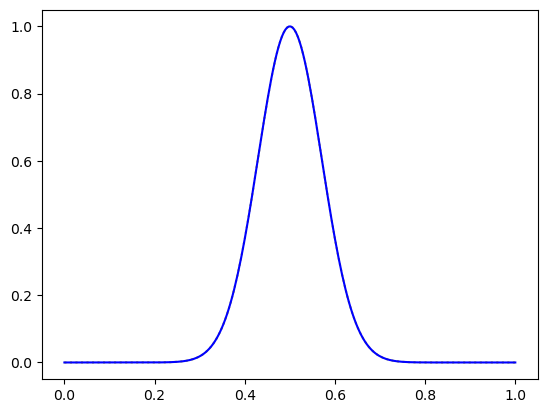

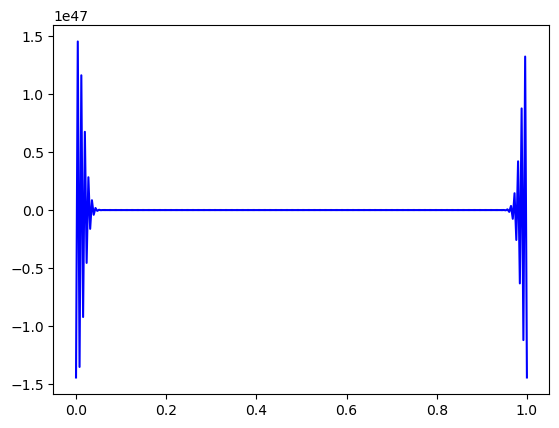

In [36]:
# Lax-Wendroff method

# Grid points = 64, C = 0.5,1,10
create_plot(0.5, 64, 'L-W')
create_plot(1, 64, 'L-W')
create_plot(10, 64, 'L-W')

# Grid points = 256, C = 0.5,1,10
create_plot(0.5, 256, 'L-W')
create_plot(1, 256, 'L-W')
create_plot(10, 256, 'L-W')

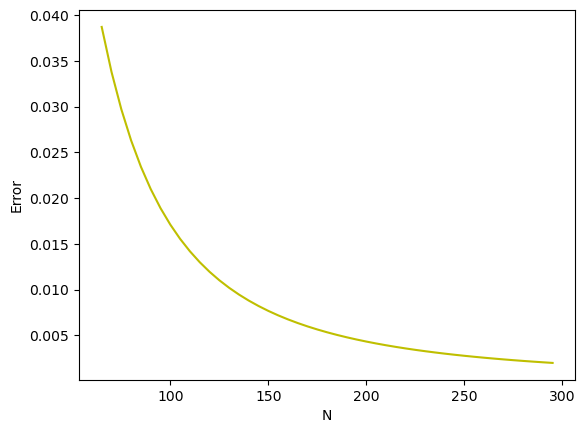

In [40]:
# Plotting the error as N increases
errors = []
for N in range(65, 300, 5):
    errors.append(create_plot(0.5, N, method = "L-W", error = True))
plt.plot(range(65, 300, 5), errors, c = 'y')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()

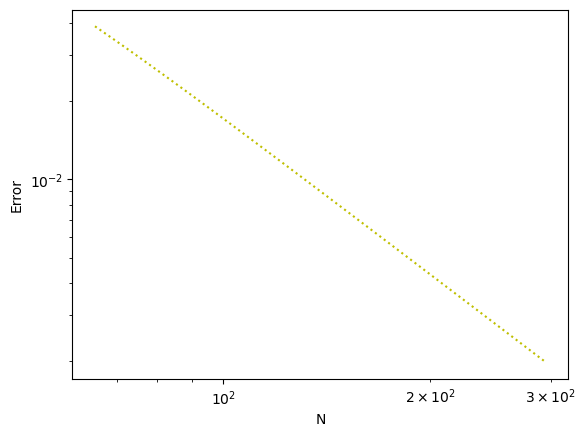

In [42]:
# Loglog plot
plt.loglog(range(65, 300, 5), errors, c = 'y', ls=':')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()

This graph has a O(∆x^2) convergence. As n increases, the error decreases exponentially, and approaches 0.